### Projeto1
A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Você é um Data Scientist contrato pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

Portanto, seu trabalho como Data Scientist é responder as seguinte perguntas:

##### 1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
##### 2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
##### 3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda?
##### 4. Quais seriam as sugestões de mudanças?
##### 5. Qual o incremento no preço dado por cada opção de reforma?

fonte:https://sejaumdatascientist.com/

https://www.kaggle.com/harlfoxem/housesalesprediction

### Variable | Description
1. Id:Unique ID for each home sold
2. Date: Date of the home sale
3. Price: Price of each home sold
4. Bedrooms: Number of bedrooms
5. Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. Sqft_living: Square footage of the apartments interior living space
7. Sqft_lot: Square footage of the land space
8. Floors: Number of floors
9. Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
10. View: An index from 0 to 4 of how good the view of the property was
11. Condition: An index from 1 to 5 on the condition of the apartment,
12. Grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
13. Sqft_above: The square footage of the interior housing space that is above ground level
14. Sqft_basement: The square footage of the interior housing space that is below ground level
15. Yr_built: The year the house was initially built
16. Yr_renovated: The year of the house’s last renovation
17. Zipcode: What zipcode area the house is in
18. Lat: Lattitude
19. Long: Longitude
20. Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
21. Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

### Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Valores que estão faltando

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Dados duplicados

In [9]:
df.drop_duplicates(subset=['id'], inplace=True)

# Transformando a data

In [10]:
df['date']= pd.to_datetime( df['date'] ,format="%Y/%m/%d")

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
 df = df.sort_values(by='date')

In [13]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3323,1323089184,2014-05-02,452500.0,3,2.50,2430,88426,1.0,0,0,...,7,1570,860,1985,0,98045,47.4828,-121.718,1560,56827
3714,6127600110,2014-05-02,640000.0,4,2.00,1520,6200,1.5,0,0,...,7,1520,0,1945,0,98115,47.6780,-122.269,1910,6200
3723,7739100015,2014-05-02,463000.0,3,1.75,1710,7320,1.0,0,0,...,7,1710,0,1948,0,98155,47.7512,-122.281,2260,8839
7323,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0,0,...,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942
502,5467900070,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,...,8,1930,0,1966,0,98042,47.3672,-122.151,2200,12825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17397,6815100380,2015-05-14,855000.0,3,1.75,1900,4000,1.0,0,0,...,7,1300,600,1965,0,98103,47.6854,-122.331,1880,4000
11560,6752600320,2015-05-14,360000.0,4,2.50,2020,7289,2.0,0,0,...,7,2020,0,1994,0,98031,47.4010,-122.171,2090,7259
5637,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650
13053,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,6,720,670,1941,0,98115,47.6914,-122.308,920,6380


# Analisando o preço

/home/escobar/miniconda3/envs/house/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


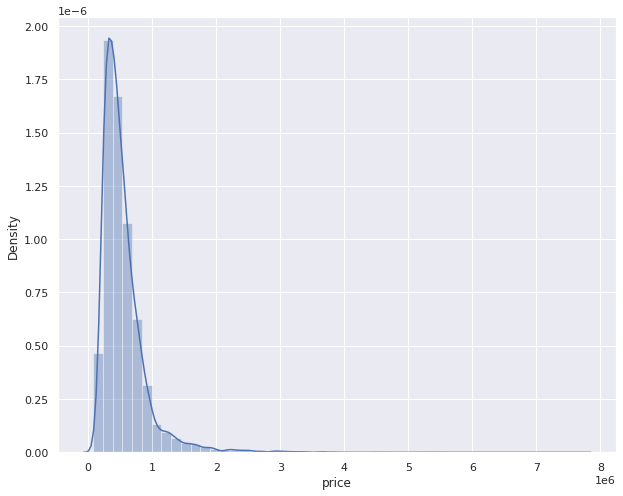

In [14]:
sns.set(style='darkgrid',rc={'figure.figsize':(10,8)})
sns.distplot(df['price']);

# Analisando os dados
* lat x long
* Bedrooms
* Bathrooms
* Floors
* Waterfront
* View
* Condition
* grade

# lat x long

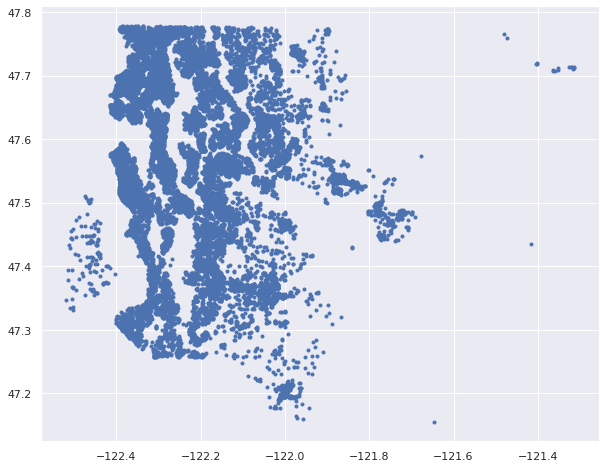

In [155]:
plt.scatter(df['long'], df['lat'], marker='.')

Text(0.1, 33, 'Outilier')

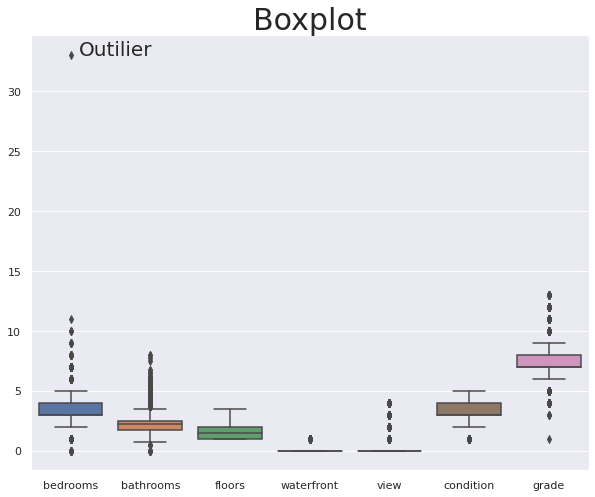

In [15]:
sns.set(style='darkgrid',rc={'figure.figsize':(10,8)})
sns.boxplot(data = df.loc[:,['bedrooms','bathrooms','floors','waterfront','view','condition','grade']]).set_title('Boxplot',size=30)
plt.annotate(text='Outilier', xy=(0.1, 33), xycoords='data', fontsize=20)


* sqft_living
* sqft_lot
* sqft_above
* sqft_basement
* yr_built
* yr_renovated
* sqft_living15
* sqft_lot15

array([[<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>]], dtype=object)

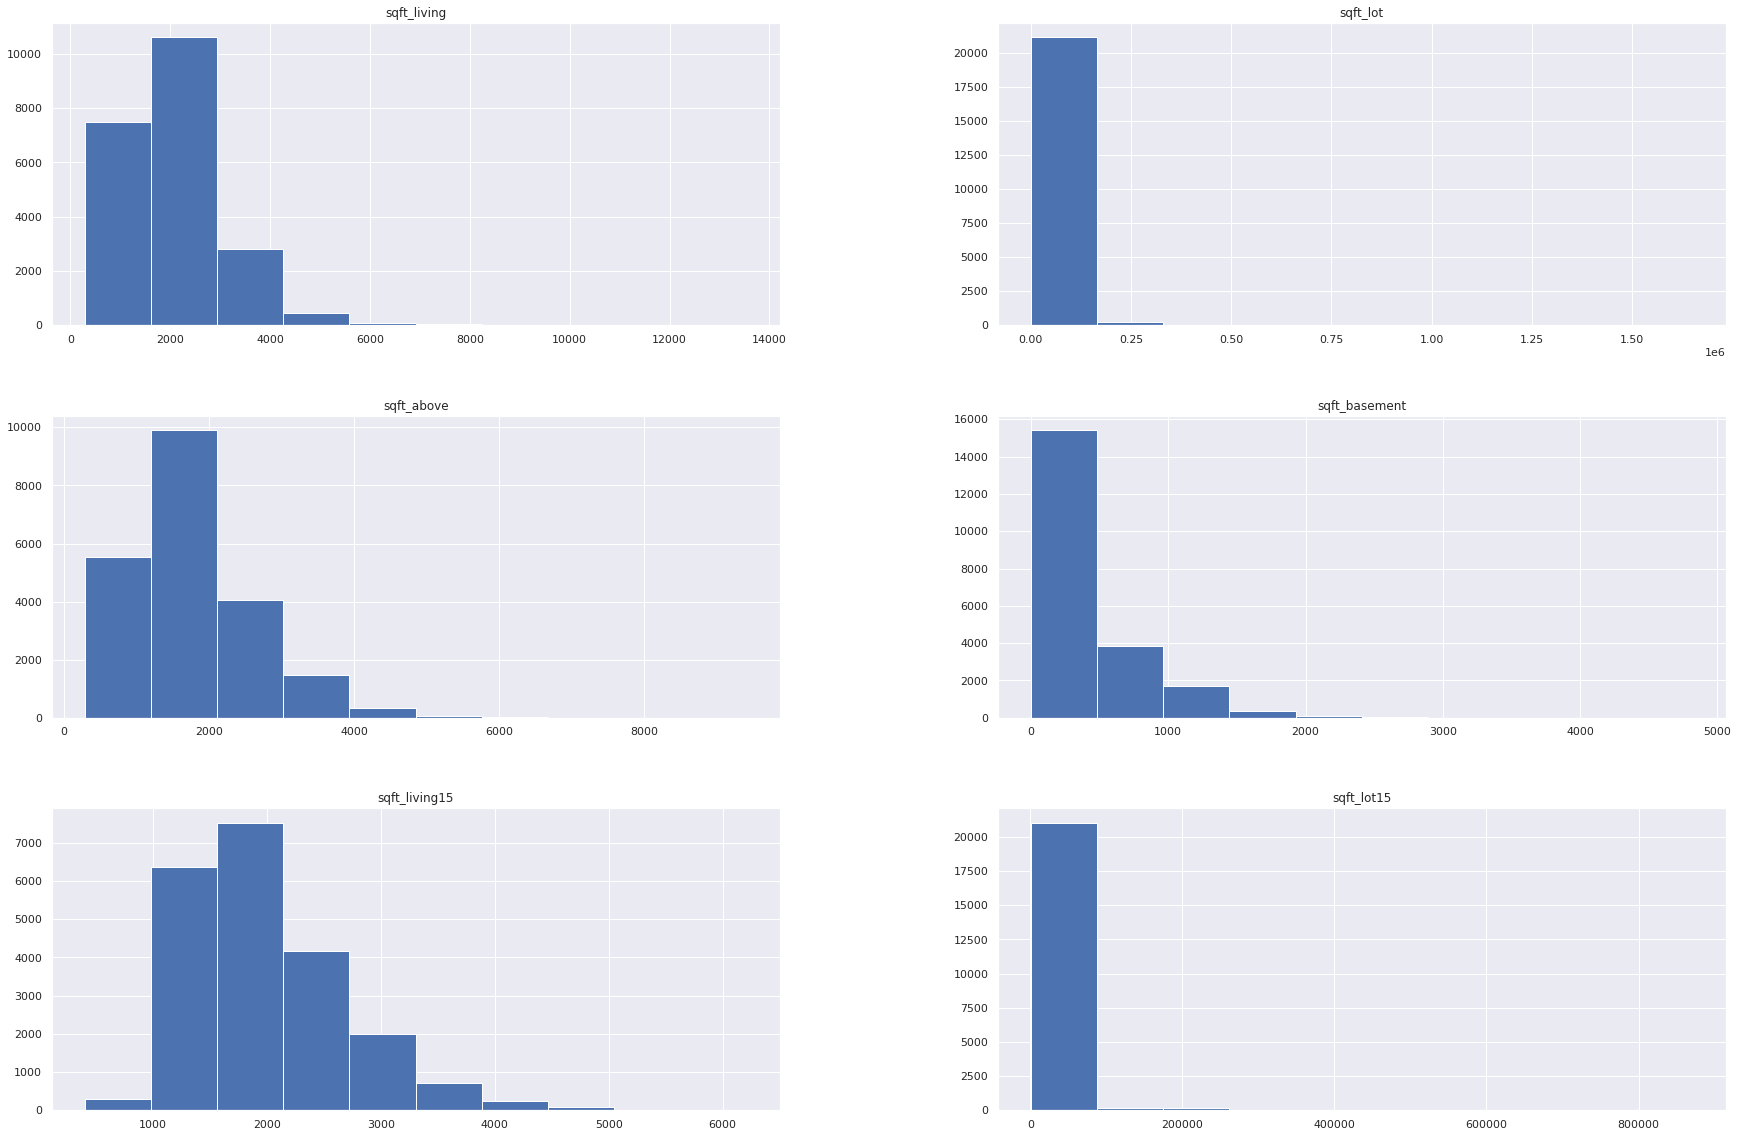

In [16]:
df.loc[:,['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].hist(figsize=(30 ,20))

In [17]:
df['yr_built'].unique()

array([1985, 1945, 1948, 1954, 1966, 2013, 1968, 1929, 1979, 1909, 2007,
       1974, 1949, 1921, 2000, 2001, 1923, 1983, 2006, 1990, 1996, 1955,
       1977, 1950, 1980, 1987, 1939, 2004, 1978, 1967, 2005, 1951, 1938,
       1965, 1995, 1944, 2014, 1920, 1956, 2009, 1976, 1989, 2012, 1992,
       1957, 1963, 1959, 1991, 1997, 2008, 1973, 1986, 1900, 1988, 1928,
       1902, 1994, 1942, 1984, 1998, 1971, 1960, 2010, 1969, 1953, 1962,
       1908, 1958, 1999, 1982, 1975, 1930, 2003, 1961, 1924, 1916, 1970,
       1912, 1940, 1947, 1964, 1905, 1903, 1926, 1952, 1943, 1904, 1906,
       1993, 1937, 1981, 2011, 1914, 2002, 1917, 1922, 1910, 1913, 1946,
       1941, 1918, 1925, 1972, 1932, 1919, 1911, 1936, 1931, 1927, 1907,
       1901, 1915, 2015, 1935, 1933, 1934])

In [18]:
df['yr_renovated'].unique()

array([   0, 1994, 1954, 1958, 2014, 2011, 1998, 1992, 1986, 2005, 2013,
       2002, 2004, 1990, 1984, 2001, 1956, 2003, 2000, 2010, 1996, 1977,
       2007, 1983, 1981, 1970, 1975, 1971, 1988, 1999, 2009, 1969, 1995,
       1997, 2015, 1989, 1982, 2006, 1953, 1985, 1993, 1955, 1979, 1987,
       1960, 1934, 1945, 2008, 2012, 1980, 1972, 1948, 1978, 1968, 1991,
       1974, 1965, 1946, 1940, 1963, 1976, 1964, 1973, 1967, 1944, 1959,
       1957, 1962, 1951, 1950])

In [19]:
df['renovated']= np.zeros(df.shape[0])
for i in df[df['yr_renovated']!=0].index:
    df.loc[i,'renovated'] =1


In [20]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
3323,1323089184,2014-05-02,452500.0,3,2.50,2430,88426,1.0,0,0,...,1570,860,1985,0,98045,47.4828,-121.718,1560,56827,0.0
3714,6127600110,2014-05-02,640000.0,4,2.00,1520,6200,1.5,0,0,...,1520,0,1945,0,98115,47.6780,-122.269,1910,6200,0.0
3723,7739100015,2014-05-02,463000.0,3,1.75,1710,7320,1.0,0,0,...,1710,0,1948,0,98155,47.7512,-122.281,2260,8839,0.0
7323,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0,0,...,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,0.0
502,5467900070,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,...,1930,0,1966,0,98042,47.3672,-122.151,2200,12825,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17397,6815100380,2015-05-14,855000.0,3,1.75,1900,4000,1.0,0,0,...,1300,600,1965,0,98103,47.6854,-122.331,1880,4000,0.0
11560,6752600320,2015-05-14,360000.0,4,2.50,2020,7289,2.0,0,0,...,2020,0,1994,0,98031,47.4010,-122.171,2090,7259,0.0
5637,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,0.0
13053,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,720,670,1941,0,98115,47.6914,-122.308,920,6380,0.0


## bedrooms

In [21]:
df['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
8       13
0       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

### Outlier

In [22]:
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,0.0


In [23]:
df['bedrooms'].replace(33,3)

3323     3
3714     4
3723     3
7323     4
502      3
        ..
17397    3
11560    4
5637     5
13053    2
16594    4
Name: bedrooms, Length: 21436, dtype: int64

In [24]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
3323,1323089184,2014-05-02,452500.0,3,2.50,2430,88426,1.0,0,0,...,1570,860,1985,0,98045,47.4828,-121.718,1560,56827,0.0
3714,6127600110,2014-05-02,640000.0,4,2.00,1520,6200,1.5,0,0,...,1520,0,1945,0,98115,47.6780,-122.269,1910,6200,0.0
3723,7739100015,2014-05-02,463000.0,3,1.75,1710,7320,1.0,0,0,...,1710,0,1948,0,98155,47.7512,-122.281,2260,8839,0.0
7323,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0,0,...,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,0.0
502,5467900070,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,...,1930,0,1966,0,98042,47.3672,-122.151,2200,12825,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17397,6815100380,2015-05-14,855000.0,3,1.75,1900,4000,1.0,0,0,...,1300,600,1965,0,98103,47.6854,-122.331,1880,4000,0.0
11560,6752600320,2015-05-14,360000.0,4,2.50,2020,7289,2.0,0,0,...,2020,0,1994,0,98031,47.4010,-122.171,2090,7259,0.0
5637,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,0.0
13053,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,720,670,1941,0,98115,47.6914,-122.308,920,6380,0.0


##  bathrooms

In [25]:
df['bathrooms'].value_counts()

2.50    5355
1.00    3795
1.75    3020
2.25    2031
2.00    1913
1.50    1430
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
0.50       4
5.75       4
6.25       2
6.75       2
6.50       2
8.00       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

#### Casas sem banheiro

In [26]:
df[df['bathrooms']==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
875,6306400140,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,...,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,0.0
6994,2954400190,2014-06-24,1295650.0,0,0.0,4810,28008,2.0,0,0,...,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,0.0
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,...,690,0,1948,0,98053,47.6429,-121.955,1690,19290,0.0
19452,3980300371,2014-09-26,142000.0,0,0.0,290,20875,1.0,0,0,...,290,0,1963,0,98024,47.5308,-121.888,1620,22850,0.0
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,...,600,0,1950,0,98045,47.5316,-121.749,990,22549,0.0
9854,7849202190,2014-12-23,235000.0,0,0.0,1470,4800,2.0,0,0,...,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,0.0
3119,3918400017,2015-02-05,380000.0,0,0.0,1470,979,3.0,0,2,...,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,0.0
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,...,670,0,1966,0,98022,47.2638,-121.906,1160,42882,0.0
14423,9543000205,2015-04-13,139950.0,0,0.0,844,4269,1.0,0,0,...,844,0,1913,0,98001,47.2781,-122.250,1380,9600,0.0
9773,3374500520,2015-04-29,355000.0,0,0.0,2460,8049,2.0,0,0,...,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,0.0


In [27]:
df.drop(df[df['bathrooms']==0].index, inplace=True)

# Correlação

<AxesSubplot:>

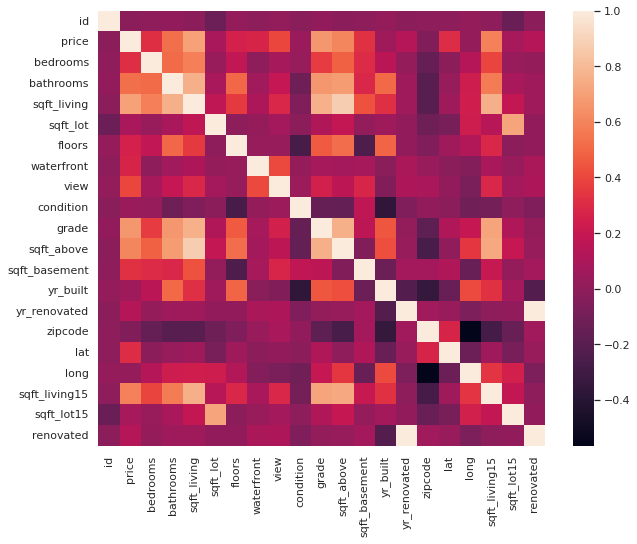

In [28]:
sns.heatmap(df.corr())

In [29]:
df.corr()['price'].sort_values(ascending=False)[0:5]

price            1.000000
sqft_living      0.701871
grade            0.667905
sqft_above       0.605297
sqft_living15    0.584517
Name: price, dtype: float64

# Entendendo como algumas variáveis se relacionam com o Preço do imóvel

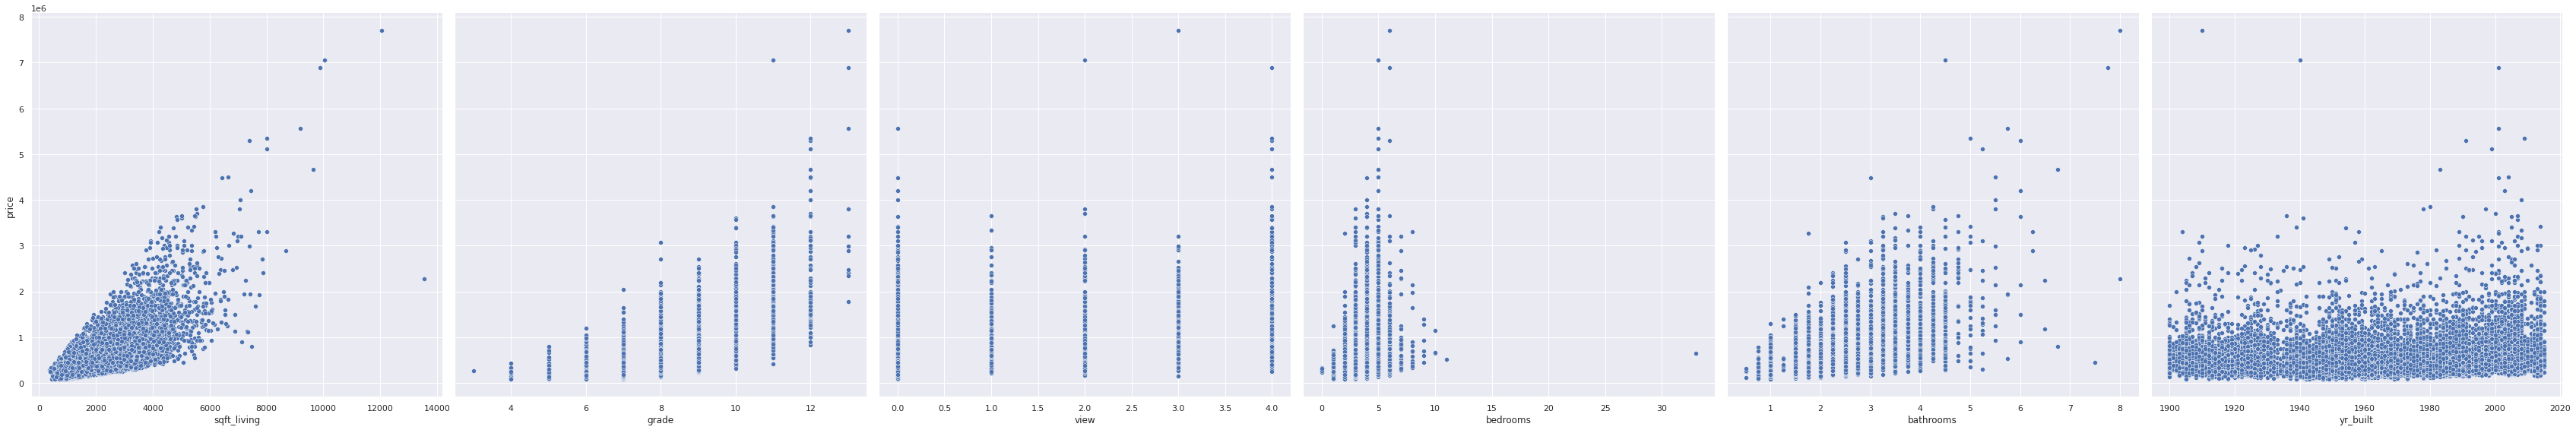

In [30]:
sns.pairplot(df, x_vars=["sqft_living", "grade","view", "bedrooms",'bathrooms','yr_built'],y_vars=["price"],height=8)

### Retirando algumas colunas

In [31]:
df.reset_index(drop=True,inplace=True)

In [32]:
df_pipe = df.drop(['id','date',], axis=1)

In [33]:
df_train = df_pipe.iloc[:17000]

In [34]:
df_test = df_pipe.iloc[17001:20001]

In [35]:
df_out_of_time= df_pipe.iloc[20002:]

In [36]:
df_out_of_time

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
20002,395000.0,3,2.50,1960,3953,2.0,0,0,3,8,1960,0,1999,0,98059,47.4904,-122.158,1690,3593,0.0
20003,413100.0,3,2.25,1790,231303,1.0,0,0,3,7,1250,540,1980,0,98077,47.7558,-122.027,2090,93654,0.0
20004,795000.0,5,3.00,2750,10000,1.0,0,0,4,7,1730,1020,1957,0,98008,47.5878,-122.130,2520,10000,0.0
20005,479900.0,4,2.00,2510,9750,1.0,0,0,3,8,1630,880,1960,0,98028,47.7438,-122.229,1980,9750,0.0
20006,465000.0,3,1.50,1280,4720,1.0,0,0,4,7,850,430,1941,0,98126,47.5509,-122.377,1280,4720,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21421,855000.0,3,1.75,1900,4000,1.0,0,0,3,7,1300,600,1965,0,98103,47.6854,-122.331,1880,4000,0.0
21422,360000.0,4,2.50,2020,7289,2.0,0,0,3,7,2020,0,1994,0,98031,47.4010,-122.171,2090,7259,0.0
21423,450000.0,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,0.0
21424,445500.0,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,0.0


In [37]:
df_train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,452500.0,3,2.50,2430,88426,1.0,0,0,4,7,1570,860,1985,0,98045,47.4828,-121.718,1560,56827,0.0
1,640000.0,4,2.00,1520,6200,1.5,0,0,3,7,1520,0,1945,0,98115,47.6780,-122.269,1910,6200,0.0
2,463000.0,3,1.75,1710,7320,1.0,0,0,3,7,1710,0,1948,0,98155,47.7512,-122.281,2260,8839,0.0
3,435000.0,4,1.00,1450,8800,1.0,0,0,4,7,1450,0,1954,0,98006,47.5746,-122.135,1260,8942,0.0
4,342000.0,3,2.00,1930,11947,1.0,0,0,4,8,1930,0,1966,0,98042,47.3672,-122.151,2200,12825,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,420000.0,6,3.00,2290,6344,2.0,0,0,3,7,2290,0,1980,0,98126,47.5650,-122.370,1360,3202,0.0
16996,244950.0,4,2.50,1790,19177,1.0,0,0,4,7,1790,0,1966,0,98030,47.3617,-122.172,1760,11726,0.0
16997,218000.0,3,1.50,1140,4875,1.0,0,0,5,6,1140,0,1970,0,98042,47.3684,-122.080,980,5070,0.0
16998,780000.0,3,2.50,2940,15875,2.0,0,0,3,10,2940,0,1994,0,98075,47.5947,-122.016,2980,15875,0.0


In [38]:
df_test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
17001,336600.0,3,2.25,1654,8464,2.0,0,0,3,7,1654,0,1995,0,98038,47.3618,-122.033,1975,8515,0.0
17002,1000000.0,4,3.50,3180,12528,2.0,0,1,4,9,2060,1120,1979,0,98177,47.7058,-122.379,2850,11410,0.0
17003,635000.0,4,2.25,2350,46173,2.0,0,0,4,8,2350,0,1980,0,98053,47.6657,-122.067,2390,36567,0.0
17004,354500.0,3,1.00,1150,11396,1.5,0,0,4,7,1150,0,1950,0,98155,47.7435,-122.296,1600,8146,0.0
17005,561000.0,4,2.50,2550,5395,2.0,0,0,3,8,2550,0,2001,0,98065,47.5355,-121.874,2850,6109,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,489000.0,4,2.50,2170,4587,2.0,0,0,3,7,2170,0,2006,0,98065,47.5396,-121.889,2170,5211,0.0
19997,1387000.0,4,3.50,4010,10880,2.0,0,3,4,11,3150,860,1990,0,98040,47.5359,-122.213,3530,17310,0.0
19998,375000.0,4,2.00,2270,18450,1.0,0,0,3,7,2270,0,1961,0,98001,47.3264,-122.262,2150,18450,0.0
19999,144000.0,3,1.00,1250,8314,1.0,0,0,3,6,1250,0,1958,0,98058,47.4522,-122.178,1188,7700,0.0


# Preparação dos dados

# Pipeline

In [39]:
classifiers = [
DecisionTreeRegressor(),
KNeighborsRegressor(),
RandomForestRegressor(),
LinearRegression(),
GradientBoostingRegressor(),
RidgeCV(),
XGBRegressor()
]

scalers = [MinMaxScaler() ,StandardScaler()]

In [40]:
for scl in scalers:
    print(scl)
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    for clf in classifiers:
        pipe = Pipeline([('scl', scl), ('clf',clf)])
        pipe.fit(df_train.drop('price',axis=1), df_train['price'])        
        cv_score = cross_val_score(pipe, df_train.drop('price',axis=1), df_train['price'], cv=5)
        score = pipe.score(df_test.drop('price',axis=1), df_test['price'])
        print(clf)
        print('test_score |',score)
        print('cv_score |', np.mean(cv_score))
        print('-----------------------------------------------')

MinMaxScaler()
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DecisionTreeRegressor()
test_score | 0.7512202427032333
cv_score | 0.744238320683029
-----------------------------------------------
KNeighborsRegressor()
test_score | 0.752650961639659
cv_score | 0.7794314253688427
-----------------------------------------------
RandomForestRegressor()
test_score | 0.8741336610351945
cv_score | 0.8811662528436196
-----------------------------------------------
LinearRegression()
test_score | 0.6823011902614413
cv_score | 0.7043073521494488
-----------------------------------------------
GradientBoostingRegressor()
test_score | 0.8573663457353271
cv_score | 0.8678065139178013
-----------------------------------------------
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
test_score | 0.6812477486068205
cv_score | 0.7037996255234957
-----------------------------------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, c

In [41]:
pipe = Pipeline([('scaler', StandardScaler()),('XGBR',  XGBRegressor())])

In [42]:
pipe.fit(df_train.drop('price',axis=1), df_train['price']) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGBR',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=4, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

<BarContainer object of 19 artists>

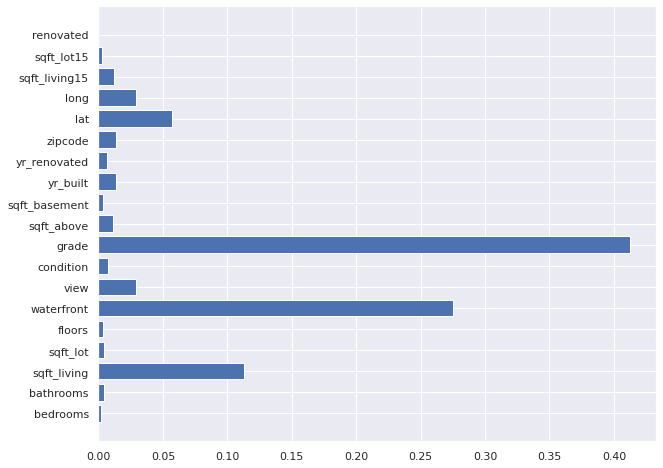

In [43]:
plt.barh(df_train.drop('price',axis=1).columns, pipe.steps[1][1].feature_importances_)

In [44]:
pipe.score(df_out_of_time.drop('price',axis=1), df_out_of_time['price'])

0.8465645171576807

In [45]:
y_pred_test = pipe.predict(df_out_of_time.drop('price',axis=1))

In [46]:
df_graf = pd.DataFrame({'Atual': df_out_of_time['price'], 'Predito': y_pred_test})

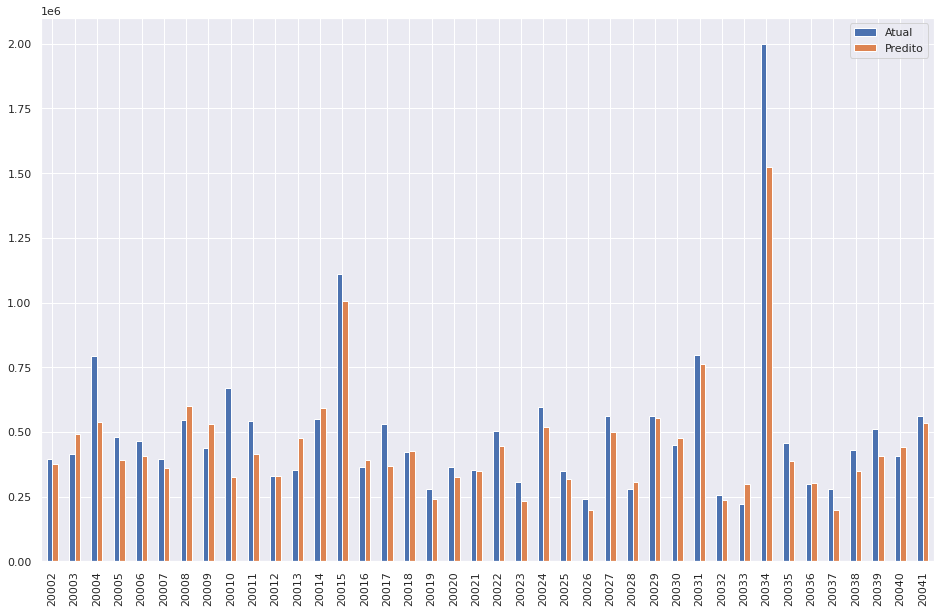

In [236]:
df1 = df_graf.head(40)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

# 1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?

     Com o modelo certamente treinado podemos tentar aproximar o valor real do imóvel, CEO deveria comprar os  imóveis desvalorizados para que sejam vendidos por um valor maior assim a House Rocket conseguiria         encontrar melhores oportunidades de negócios.

# 2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?

In [221]:
df_gb_month = pd.DataFrame(df.groupby(df.date.dt.month).agg('size'), columns=['size'])
df_gb_month['month'] = ['janeiro', 'fevereiro', 'março', 'abril' ,'maio' ,'junho' ,'julho' ,'agosto' ,'setembro' ,'outubro' ,'novembro' ,'dezembro']

In [222]:
df_gb_month.index.rename(name='month', inplace=True)

In [226]:
df_gb_month.set_index('month', drop=True, inplace=True)

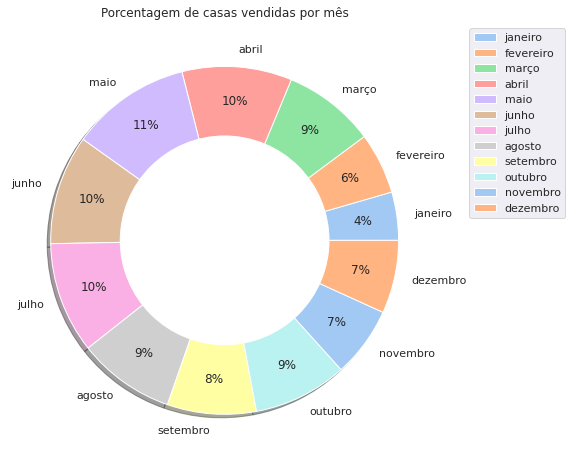

In [228]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(df_gb_month['size'], labels = df_gb_month.index, colors = colors, autopct='%.0f%%',shadow = True, pctdistance=0.80)
plt.legend(loc ="upper left", bbox_to_anchor =(1.05, 0, 0.5, 1))
centre_circle = plt.Circle((0,0),0.6,fc='white')
plt.title("Porcentagem de casas vendidas por mês")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

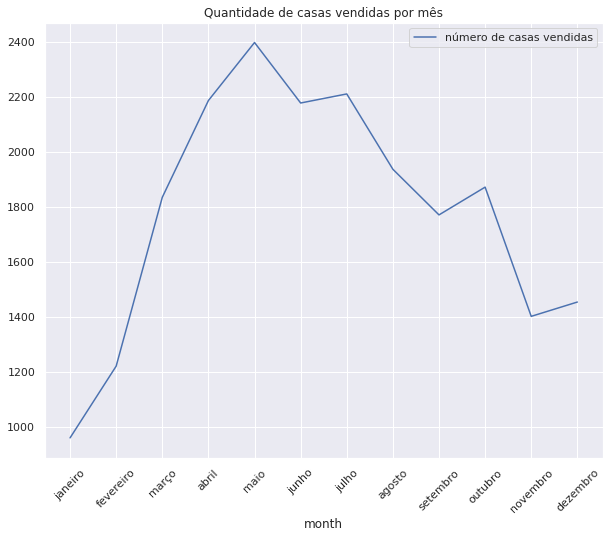

In [237]:
#df_gb_month.plot()

fig, ax = plt.subplots()
df_gb_month.plot(ax = ax)
ax.set_xticks(range(len(df_gb_month.index)))
ax.set_xticklabels(df_gb_month.index)
plt.xticks(rotation = 45)
plt.legend(['número de casas vendidas'])
plt.title("Quantidade de casas vendidas por mês")
plt.show()


# 3. House Rocket deveria fazer uma reforma para aumentar o preço da venda?

### A House Rocket deveria realizar uma reforma, a média do preço das casas reformadas é 43% maior do que a média do preço das casas não reformadas

In [256]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,city,state,timezone
0,1323089184,2014-05-02,452500.0,3,2.50,2430,88426,1.0,0,0,...,0,98045,47.4828,-121.718,1560,56827,0.0,Seattle,WA,Pacific
1,6127600110,2014-05-02,640000.0,4,2.00,1520,6200,1.5,0,0,...,0,98115,47.6780,-122.269,1910,6200,0.0,Seattle,WA,Pacific
2,7739100015,2014-05-02,463000.0,3,1.75,1710,7320,1.0,0,0,...,0,98155,47.7512,-122.281,2260,8839,0.0,Seattle,WA,Pacific
3,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0,0,...,0,98006,47.5746,-122.135,1260,8942,0.0,Seattle,WA,Pacific
4,5467900070,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,...,0,98042,47.3672,-122.151,2200,12825,0.0,Seattle,WA,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21421,6815100380,2015-05-14,855000.0,3,1.75,1900,4000,1.0,0,0,...,0,98103,47.6854,-122.331,1880,4000,0.0,Seattle,WA,Pacific
21422,6752600320,2015-05-14,360000.0,4,2.50,2020,7289,2.0,0,0,...,0,98031,47.4010,-122.171,2090,7259,0.0,Seattle,WA,Pacific
21423,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,0,98007,47.5951,-122.144,1870,7650,0.0,Seattle,WA,Pacific
21424,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,0,98115,47.6914,-122.308,920,6380,0.0,Seattle,WA,Pacific


In [257]:
no_renovated=[df[df['renovated']==0].mean().price]

/tmp/ipykernel_11663/1659536140.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/tmp/ipykernel_11663/1659536140.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [258]:
renovated = [df[df['renovated']==1].mean().price]

/tmp/ipykernel_11663/13307981.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/tmp/ipykernel_11663/13307981.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [253]:
# variação percentual

vp = ((renovated[0] - no_renovated[0])/no_renovated[0])*100
vp

43.51377771076803

In [254]:
df_reformada = pd.DataFrame({'Reformada': renovated, 'Não Reformada': no_renovated})

Text(0.5, 1.0, 'Média do preço das casas reformadas / não reformadas:')

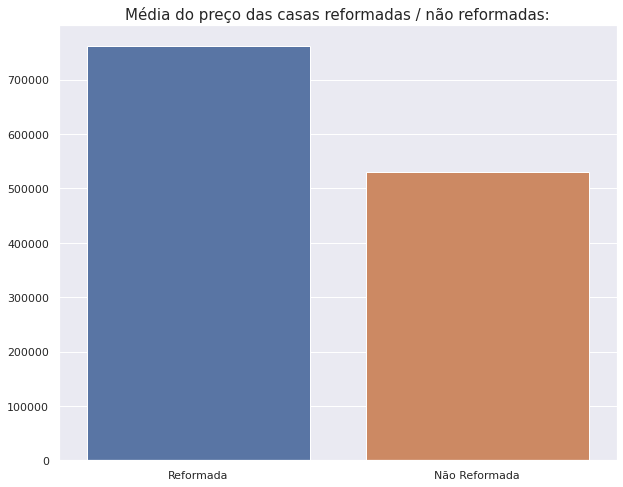

In [255]:
sns.barplot(data=df_reformada).set_title('Média do preço das casas reformadas / não reformadas:',size=15)

# 4. Quais seriam as sugestões de mudanças?

  1. As principais sugestões de mudanças seriam melhorar a estrutura e o design da casa realizando uma reforma, com isso séria possível obter um lucro maior sobre o imóvel.

In [106]:
df.corr()['price'].sort_values(ascending=False)[1:6]

sqft_living      0.701871
grade            0.667905
sqft_above       0.605297
sqft_living15    0.584517
bathrooms        0.526208
Name: price, dtype: float64

<AxesSubplot:xlabel='grade', ylabel='price'>

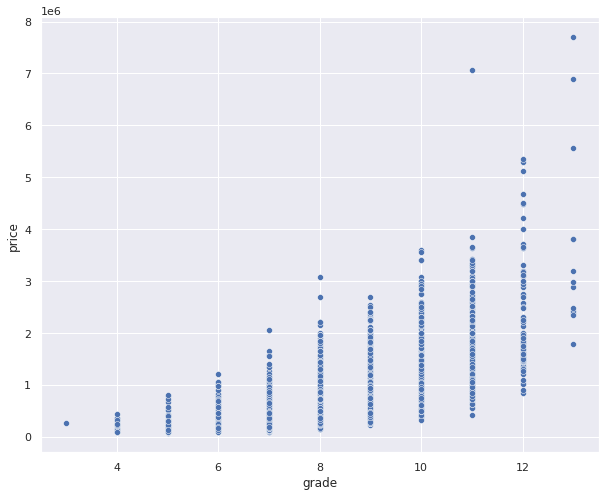

In [55]:
sns.scatterplot(data=df, x="grade", y="price")

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

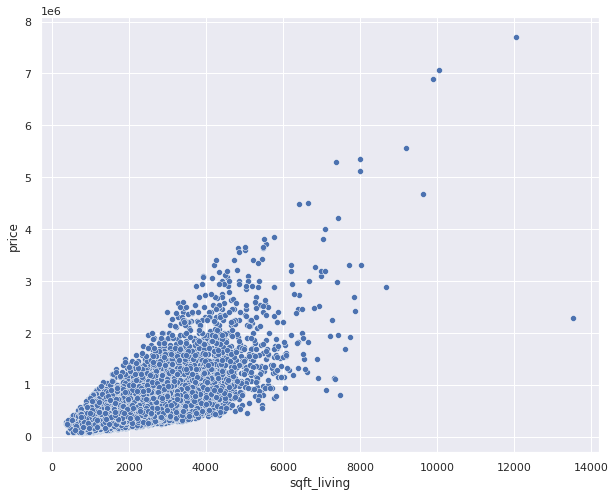

In [56]:
sns.scatterplot(data=df, x="sqft_living", y="price")

# 5. Qual o incremento no preço dado por cada opção de reforma?

In [276]:
df_inc = df_out_of_time[df_out_of_time['yr_renovated']==0].copy()
df_antes_reforma =df_out_of_time[df_out_of_time['yr_renovated']==0].copy()

In [277]:
df_inc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
20002,395000.0,3,2.50,1960,3953,2.0,0,0,3,8,1960,0,1999,0,98059,47.4904,-122.158,1690,3593,0.0
20003,413100.0,3,2.25,1790,231303,1.0,0,0,3,7,1250,540,1980,0,98077,47.7558,-122.027,2090,93654,0.0
20004,795000.0,5,3.00,2750,10000,1.0,0,0,4,7,1730,1020,1957,0,98008,47.5878,-122.130,2520,10000,0.0
20005,479900.0,4,2.00,2510,9750,1.0,0,0,3,8,1630,880,1960,0,98028,47.7438,-122.229,1980,9750,0.0
20006,465000.0,3,1.50,1280,4720,1.0,0,0,4,7,850,430,1941,0,98126,47.5509,-122.377,1280,4720,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21421,855000.0,3,1.75,1900,4000,1.0,0,0,3,7,1300,600,1965,0,98103,47.6854,-122.331,1880,4000,0.0
21422,360000.0,4,2.50,2020,7289,2.0,0,0,3,7,2020,0,1994,0,98031,47.4010,-122.171,2090,7259,0.0
21423,450000.0,5,2.00,1870,7344,1.5,0,0,3,7,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,0.0
21424,445500.0,2,1.75,1390,6670,1.0,0,0,3,6,720,670,1941,0,98115,47.6914,-122.308,920,6380,0.0


In [278]:
df_inc['grade'] = df_inc['grade']+1

In [279]:
df_inc['renovated']=1
df_inc['yr_renovated']=2021

In [280]:
df_inc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
20002,395000.0,3,2.50,1960,3953,2.0,0,0,3,9,1960,0,1999,2021,98059,47.4904,-122.158,1690,3593,1
20003,413100.0,3,2.25,1790,231303,1.0,0,0,3,8,1250,540,1980,2021,98077,47.7558,-122.027,2090,93654,1
20004,795000.0,5,3.00,2750,10000,1.0,0,0,4,8,1730,1020,1957,2021,98008,47.5878,-122.130,2520,10000,1
20005,479900.0,4,2.00,2510,9750,1.0,0,0,3,9,1630,880,1960,2021,98028,47.7438,-122.229,1980,9750,1
20006,465000.0,3,1.50,1280,4720,1.0,0,0,4,8,850,430,1941,2021,98126,47.5509,-122.377,1280,4720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21421,855000.0,3,1.75,1900,4000,1.0,0,0,3,8,1300,600,1965,2021,98103,47.6854,-122.331,1880,4000,1
21422,360000.0,4,2.50,2020,7289,2.0,0,0,3,8,2020,0,1994,2021,98031,47.4010,-122.171,2090,7259,1
21423,450000.0,5,2.00,1870,7344,1.5,0,0,3,8,1870,0,1960,2021,98007,47.5951,-122.144,1870,7650,1
21424,445500.0,2,1.75,1390,6670,1.0,0,0,3,7,720,670,1941,2021,98115,47.6914,-122.308,920,6380,1


In [281]:
y_pred_inc = pipe.predict(df_inc.drop('price',axis=1))
y_pred_antes_reforma = pipe.predict(df_antes_reforma.drop('price',axis=1))

In [298]:
df_graf_inc = pd.DataFrame({'valor_vendida' : df_antes_reforma['price'],'valor_pred_modelo': y_pred_antes_reforma, 'apos_reforma': y_pred_inc})

## Incremento no preço do df out of time.
## Foi aplicado uma reforma no ano de 2021 nos imóveis do 'df out of time', aumentou-se 1 grau na escala "grade"(nível de design e construção da casa) e os imóveis tiveram um incremento:

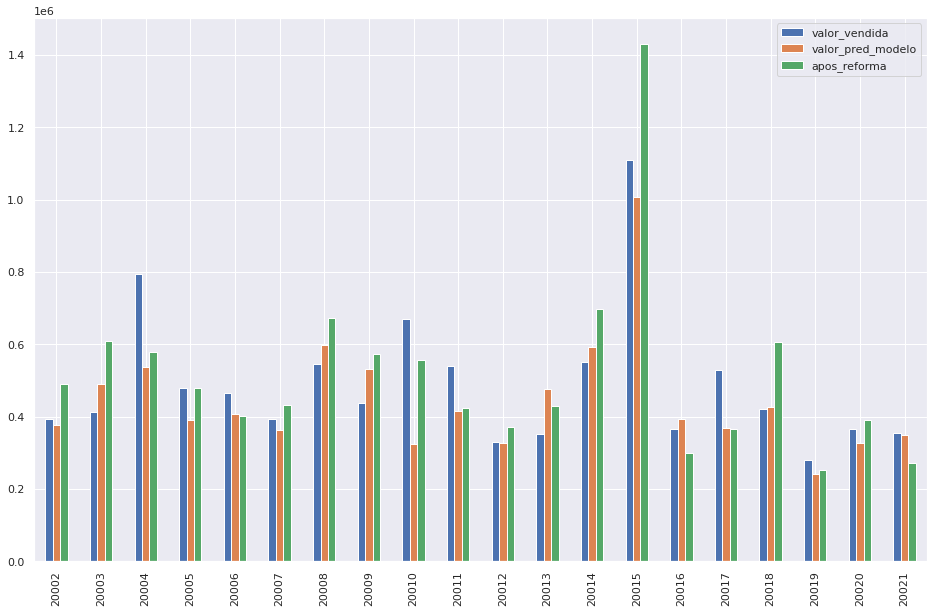

In [299]:
df1 = df_graf_inc.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

In [304]:
df_graf_inc['%incremento'] = ((df_graf_inc['apos_reforma'] - df_graf_inc['valor_vendida'])/ df_graf_inc['valor_vendida'])*100

In [305]:
df_graf_inc

,valor_vendida,valor_pred_modelo,apos_reforma,%incremento
20002,395000.0,3.775468e+05,4.910663e+05,24.320585
20003,413100.0,4.907005e+05,6.098352e+05,47.624107
20004,795000.0,5.383075e+05,5.792051e+05,-27.144017
20005,479900.0,3.917842e+05,4.806360e+05,0.153372
20006,465000.0,4.065168e+05,4.032187e+05,-13.286304
...,...,...,...,...
21421,855000.0,5.802660e+05,6.278810e+05,-26.563626
21422,360000.0,3.001337e+05,3.113080e+05,-13.525547
21423,450000.0,5.077723e+05,5.731934e+05,27.376306
21424,445500.0,3.981170e+05,4.027089e+05,-9.605184


In [306]:
len(df_graf_inc[df_graf_inc['%incremento']>0])

780

In [307]:
len(df_graf_inc[df_graf_inc['%incremento']<0])

593

# Após a reforma ser aplicado em todos os imóveis que nunca foram reformados ( df_out_of_time ) , tivemos um resultado de 780 imóveis com um possível preço acima do preço que o imóvel foi vendido.